# 0. Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules

import sys
import os

# Adiciona o diretório raiz ao path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))
from utils.plots import plot_most_subjects_per_class, plot_apriori_rules

import warnings
warnings.filterwarnings('ignore')
from dotenv import load_dotenv
load_dotenv()

True

# 1. Data Loading

In [2]:
df_classeProcesso = pd.read_csv(os.path.join(os.environ['PATH_DATA_PROCESSED'], 'df_classe_processo.csv'))

In [3]:
df_classeProcesso['setorDestino'].value_counts()

setorDestino
Fiscal            6686
Administrativa    5403
Contabilidade     1338
Judicial          1137
Saúde              443
Meio Ambiente      155
Patrimonial        121
Name: count, dtype: int64

# 2. Frequência dos Classe Processo por setorDestino

In [4]:
df_classes_agregados = df_classeProcesso.groupby('setorDestino').sum()

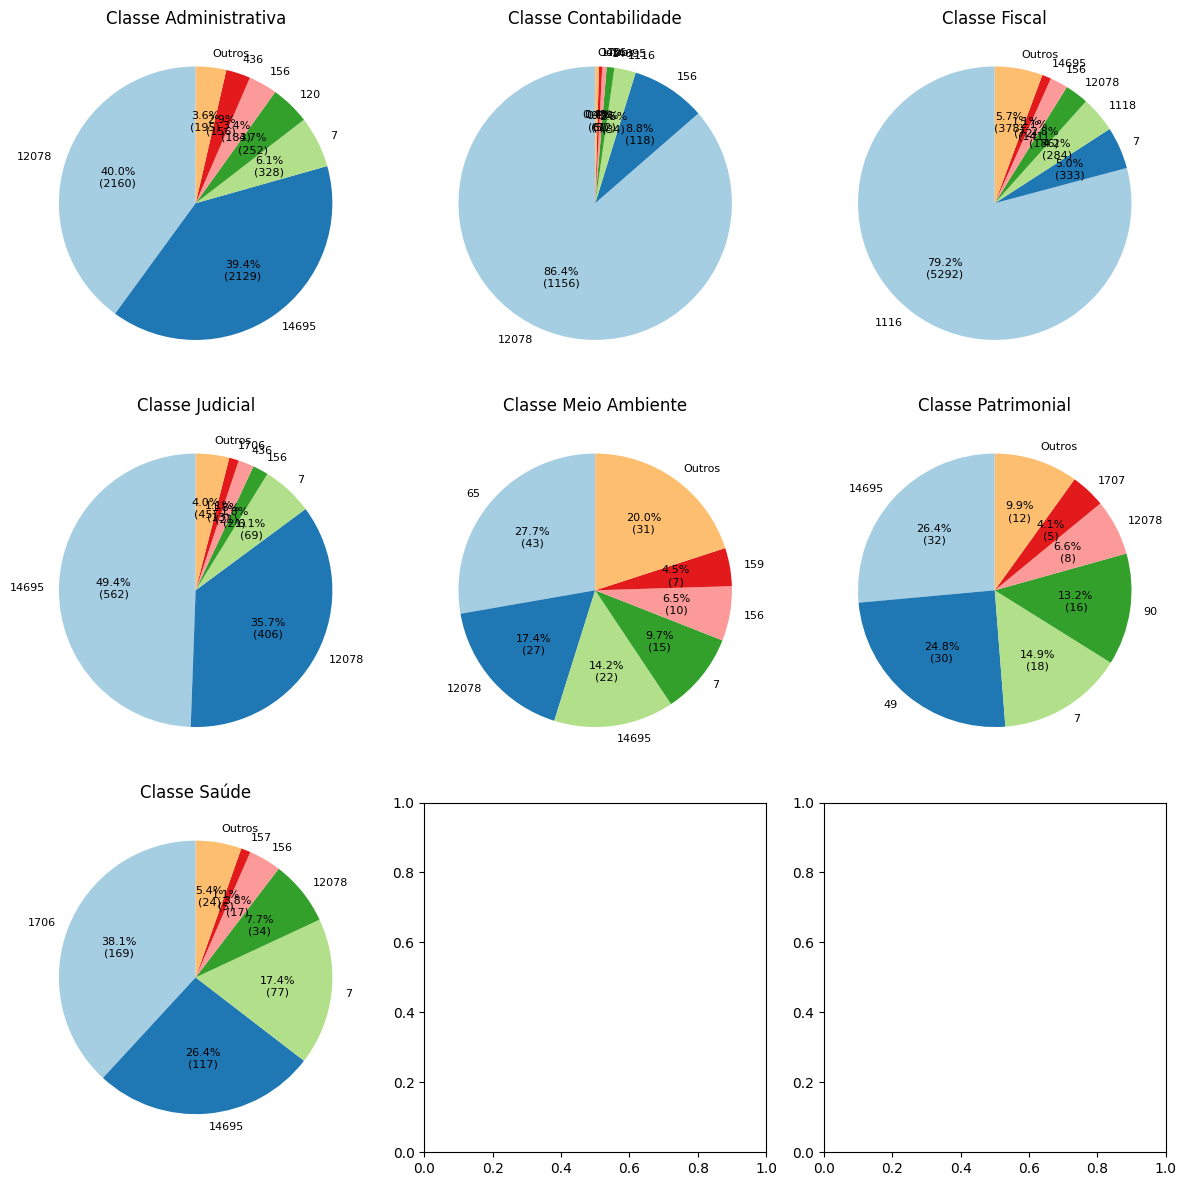

In [5]:
plot_most_subjects_per_class(df=df_classes_agregados, N=6, fontsize=8)

In [6]:
for classe in sorted(df_classes_agregados.columns, key=lambda x: sum(df_classes_agregados[x]), reverse=True):
    # Põe a quantidade de textos em porcentagem por Órgão Julgador
    serie = df_classes_agregados[classe] / sum(df_classes_agregados[classe])
    
    # Verifica se no órgão julgador temos mais de 95% de uma única classe
    if serie.max() > 0.1:
        print(f"{classe.ljust(10)}|{str(serie.idxmax()).ljust(20)}|{serie.max()*100:>6.2f}% de {sum(df_classes_agregados[classe])} textos")

1116      |Fiscal              | 99.29% de 5330 textos
12078     |Administrativa      | 54.31% de 3977 textos
14695     |Administrativa      | 72.27% de 2946 textos
7         |Fiscal              | 39.50% de 843 textos
156       |Administrativa      | 37.04% de 494 textos
1118      |Fiscal              | 94.35% de 301 textos
120       |Administrativa      | 83.72% de 301 textos
436       |Administrativa      | 73.93% de 211 textos
1706      |Saúde               | 91.85% de 184 textos
172       |Fiscal              | 76.92% de 91 textos
198       |Fiscal              | 69.41% de 85 textos
65        |Meio Ambiente       | 58.90% de 73 textos
460       |Administrativa      | 85.96% de 57 textos
22        |Fiscal              |100.00% de 45 textos
49        |Patrimonial         |100.00% de 30 textos
37        |Fiscal              |100.00% de 24 textos
83        |Fiscal              |100.00% de 23 textos
12154     |Fiscal              | 95.45% de 22 textos
152       |Administrativa      | 9

# 4. Regras

Analisando os gŕaficos acima, podemos chegar a algumas regras de classificação (baseado nas classe do processo) para algumas classes.

<span style="color:red">IMPORTANTE:</span> As regras aqui definidas ainda passarão por aprovação de Kézia e também dependerá de indicadores de score para participar da classificação.

<h2>Fiscal</h2>

Podem ser classficadas como da Fiscal se a Classe Processo é algum desses

* 1116 (Execução Fiscal)
* 1118 (Embargos à Execução Fiscal)

<h2>Patrimonial</h2>

Podem ser classficadas como da Patrimonial se a Classe Processo é algum desses

* 49 (Usucapião)
* 90 (Desapropriação)


<h2>Saúde</h2>

Podem ser classificadas como da Saúde se a Classe Processo é algum desses

* 1706 (Procedimento Comum Infância e Juventude)